In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
files = os.listdir(r'C:\Users\gosti\Downloads\results (1)\results')

In [3]:
dfs = []
for f in files:
    df1 = pd.read_csv(r'C:\Users\gosti\Downloads\results (1)\results\Adygeja_Resp_2022-03-20.csv')
    dfs.append(df1)

In [4]:
data = pd.concat(dfs)

In [5]:
df = pd.read_csv(r'C:\Users\gosti\Downloads\44_result\44_result.csv')

In [6]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

,Unnamed: 0,obj hash,name,reg num,sign date,suppliers count,st date,end date,price,enforcement,amount,bg
0,0,3793294491059705333,contracts_output,1010101008321000004,2021-09-27,1,2021-09-27,2021-12-31,500000.00,1,25000.00,0.050000
1,1,-4348589201702449915,contracts_output,1010400570119000014,2019-08-08,1,2021-01-01,2021-12-31,933718.40,1,373500.00,0.400014
2,2,7104910193783858246,contracts_output,1010400570119000016,2019-09-03,1,2021-01-01,2021-12-31,125125.25,0,6256.26,0.050000
3,3,-1585908082334183978,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,355169.38,1,19878.00,0.055968
4,4,-3961364508861951295,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,388020.88,1,19878.00,0.051229
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,6359,-4906157625135826188,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6360,6360,-8165939967697628755,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6361,6361,-725861710018253917,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106600.00,1,5500.00,0.051595
6362,6362,-2881107635711435453,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106599.90,1,5500.00,0.051595


In [7]:
df

,reg num,Region,customer inn,sign date,supplier inn,st date,end date,price,enforcement,amount,protocol date,bg,supplier type
0,2010502596517000200,Adygeja,1.050260e+08,2017-12-25,1.050203e+10,2018-01-01,2018-12-31,4.391168e+05,1,4.831433e+04,2017-12-13,9.088748,ИП
1,2010504905018000002,Adygeja,1.050490e+08,2018-04-12,1.050183e+08,2018-04-12,2020-12-30,2.317070e+09,0,2.187371e+08,2018-03-28,10.592943,ЮР
2,3010100582318000001,Adygeja,1.010058e+08,2018-05-31,1.030082e+08,2018-05-31,2020-12-31,5.174012e+07,1,1.552204e+07,2018-05-10,3.333333,ЮР
3,2010501761118000104,Adygeja,1.050176e+08,2018-11-02,2.372019e+09,2018-11-02,2019-12-31,2.323856e+05,0,1.275690e+04,2018-10-22,18.216463,ЮР
4,1010502217818000043,Adygeja,1.050222e+08,2018-11-07,2.309132e+09,2018-11-07,2019-12-31,2.164861e+07,1,3.327908e+06,2018-10-10,6.505170,ЮР
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287907,1753606732021000227,Zabajkalskij,7.536067e+09,2021-06-23,7.536156e+09,2022-01-01,2022-12-31,5.961070e+05,0,2.980535e+04,2021-06-09,20.000000,ЮР
2287908,1753612387121000008,Zabajkalskij,7.536124e+09,2021-05-17,7.536101e+09,2022-01-01,2022-12-31,8.000000e+05,0,4.000000e+04,2021-04-28,20.000000,ЮР
2287909,1752800139721000004,Zabajkalskij,7.528001e+09,2021-06-18,7.536178e+09,2022-01-01,2023-12-31,1.999800e+06,1,9.999000e+04,2021-06-07,20.000000,ЮР
2287910,1753612387121000011,Zabajkalskij,7.536124e+09,2021-05-24,7.536088e+09,2022-01-01,2023-12-31,6.800000e+05,1,3.400000e+04,2021-05-13,20.000000,ЮР


In [8]:
df.drop(columns=df[['customer inn', 'supplier inn', 'supplier type']], inplace=True)
df = df.drop_duplicates()
df = df[df.bg <= 1]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 6363
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6359 non-null   int64  
 1   obj hash         6359 non-null   int64  
 2   name             6359 non-null   object 
 3   reg num          6359 non-null   int64  
 4   sign date        6359 non-null   object 
 5   suppliers count  6359 non-null   int64  
 6   st date          6359 non-null   object 
 7   end date         6359 non-null   object 
 8   price            6359 non-null   float64
 9   enforcement      6359 non-null   int64  
 10  amount           6359 non-null   float64
 11  bg               6359 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 645.8+ KB


In [10]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18677 entries, 636 to 2287899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reg num        18677 non-null  int64  
 1   Region         18677 non-null  object 
 2   sign date      18677 non-null  object 
 3   st date        18677 non-null  object 
 4   end date       18677 non-null  object 
 5   price          18677 non-null  float64
 6   enforcement    18677 non-null  int64  
 7   amount         18677 non-null  float64
 8   protocol date  17776 non-null  object 
 9   bg             18677 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


In [12]:
df

,reg num,Region,sign date,st date,end date,price,enforcement,amount,protocol date,bg
636,2010506625620000004,Adygeja,2019-12-30,2019-12-30,2020-01-13,137442.82,0,147800.00,2019-12-20,0.929924
1218,3010700853120000001,Adygeja,2020-01-09,2020-01-09,2020-12-31,450253.00,0,450253.00,NaN,1.000000
1219,3010700853120000002,Adygeja,2020-01-09,2020-01-09,2020-12-31,2015263.00,0,2015263.00,NaN,1.000000
1262,2010501406420000002,Adygeja,2020-01-10,2020-01-10,2020-12-31,21269.00,1,34182.00,2019-12-27,0.622228
1384,3010400808220000005,Adygeja,2020-01-16,2020-01-16,2021-08-15,113200.00,0,113200.00,2019-12-30,1.000000
...,...,...,...,...,...,...,...,...,...,...
2286652,1753600824421000042,Zabajkalskij,2021-05-31,2021-05-31,2022-01-31,21923.22,0,22142.78,2021-05-18,0.990084
2286721,2753700310421000076,Zabajkalskij,2021-06-01,2021-06-01,2021-12-31,6996.00,0,31990.20,2021-05-19,0.218692
2286792,2753609569521000214,Zabajkalskij,2021-06-03,2021-06-03,2021-12-31,198810.00,1,228730.50,2021-05-20,0.869189
2286868,1753605746721000051,Zabajkalskij,2021-06-07,2021-06-07,2021-12-31,603.00,0,670.00,2021-05-27,0.900000


In [13]:
try:
    df['st date'] = df['st date'].astype('datetime64[ns]')
except pd.errors.OutOfBoundsDatetime:
    df['st date'] = df['sign date'].astype('datetime64[ns]')

In [14]:
df['end date'] = df['end date'].astype('datetime64[ns]')

In [15]:
df2 = pd.read_csv(r'C:\Users\gosti\Downloads\result.csv')

In [16]:
df2

,Unnamed: 0,reg num,supplier type,customer inn,sign date,supplier inn,st date,end date,price,enforcement,amount,protocol date,Region,bg
0,2802,3010100568619000004,ЮР,1.010057e+08,2019-04-12,1.030071e+08,2019-04-12,2019-12-31,11170860.00,1,3351258.00,2019-03-29,Adygeja,3.333333
1,262,1010501746719000024,ЮР,1.050175e+08,2019-06-25,2.635831e+09,2019-06-25,2021-12-31,89207.72,0,3478.40,2019-06-13,Adygeja,25.646194
2,6204,3010700913319000001,ЮР,1.070091e+08,2019-06-28,1.070300e+08,2019-06-28,2019-12-31,3154510.00,0,157725.50,2019-06-17,Adygeja,20.000000
3,1891,2010502596519000210,ЮР,1.050260e+08,2019-07-02,7.735165e+09,2019-07-02,2021-12-31,92438760.96,0,9243936.00,2019-06-18,Adygeja,9.999935
4,263,1010501746719000027,ИП,1.050175e+08,2019-07-15,1.080157e+10,2019-07-16,2021-12-19,200000.00,1,60000.00,2019-07-02,Adygeja,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174272,2841,1753609333821000052,ЮР,7.536093e+09,2021-07-21,7.536178e+09,2023-01-01,2023-12-31,2024925.10,1,20249.25,2021-07-08,Zabajkalskij,100.000005
3174273,2855,1753609333821000059,ЮР,7.536093e+09,2021-08-04,3.810079e+09,2023-01-01,2023-12-31,2912100.00,1,145605.00,2021-07-20,Zabajkalskij,20.000000
3174274,2857,1753609333821000060,ЮР,7.536093e+09,2021-08-04,3.810079e+09,2023-01-01,2023-12-31,2727300.00,1,136365.00,2021-07-20,Zabajkalskij,20.000000
3174275,2886,1753609333821000075,ЮР,7.536093e+09,2021-10-04,5.262007e+09,2023-01-01,2023-12-31,85756.84,0,8662.31,2021-09-23,Zabajkalskij,9.899997


In [17]:
df2.drop(columns=df2[['Unnamed: 0','customer inn', 'supplier inn', 'protocol date', 'supplier type']], inplace=True)
df2 = df2.drop_duplicates()
df2 = df2[df2.bg <= 1]
df2

,reg num,sign date,st date,end date,price,enforcement,amount,Region,bg
89,3010400830020000019,2020-09-23,2020-09-23,2020-12-31,94111.75,0,94111.75,Adygeja,1.000000
543,1010501862221000009,2021-03-03,2021-03-01,2021-12-31,0.00,0,4201.15,Adygeja,0.000000
1429,3010503414121000005,2021-06-07,2021-06-07,2021-12-31,195500.00,1,230000.00,Adygeja,0.850000
1460,2010502596521000109,2021-06-09,2021-06-09,2021-12-31,1385680.00,0,1385680.00,Adygeja,1.000000
1788,3010503896421000003,2021-06-28,2021-06-28,2022-01-31,196515.62,0,196515.62,Adygeja,1.000000
...,...,...,...,...,...,...,...,...,...
3173229,2753601151122000037,2022-01-10,2022-01-10,2022-12-31,15360.00,0,15438.00,Zabajkalskij,0.994948
3173536,3750600145022000001,2022-01-17,2022-01-17,2022-12-31,89900.00,0,89900.00,Zabajkalskij,1.000000
3173565,1753605735422000006,2022-01-18,2022-01-18,2024-01-10,32556.52,0,98050.68,Zabajkalskij,0.332038
3173732,1753609333822000003,2022-01-25,2022-01-25,2022-12-30,116237.33,0,116237.33,Zabajkalskij,1.000000


In [18]:
try:
    df2['st date'] = df2['st date'].astype('datetime64[ns]')
except pd.errors.OutOfBoundsDatetime:
    df2['st date'] = df2['sign date'].astype('datetime64[ns]')
df2['end date'] = df2['end date'].astype('datetime64[ns]')

In [19]:
data = data.drop(columns=data[['Unnamed: 0', 'obj hash', 'name', 'sign date', 'suppliers count']])

In [20]:
df = df.drop(columns=df[['Region', 'sign date']])

In [21]:
df2 = df2.drop(columns=df2[['Region', 'sign date']])

In [22]:
new_data = pd.concat([data[data.amount<1e+10], df[df.amount<1e+10], df2[df2.amount<1e+10]])

In [23]:
new_data.dtypes

reg num                   int64
st date          datetime64[ns]
end date         datetime64[ns]
price                   float64
enforcement               int64
amount                  float64
bg                      float64
protocol date            object
dtype: object

In [24]:
new_data[new_data.amount == new_data.amount.max()]

,reg num,st date,end date,price,enforcement,amount,bg,protocol date
642747,3861700618021000040,2021-04-20,2023-06-30,1307808.72,1,8.617006e+09,0.000152,2021-04-08
866878,3861700618021000040,2021-04-20,2023-06-30,1307808.72,1,8.617006e+09,0.000152,NaN


In [25]:
new_data = new_data.groupby(['reg num', 'st date', 'end date','enforcement', 'amount'],as_index=False).max()

C:\Temp\ipykernel_8160\1113842843.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  new_data = new_data.groupby(['reg num', 'st date', 'end date','enforcement', 'amount'],as_index=False).max()


In [26]:
new_data

,reg num,st date,end date,enforcement,amount,price,bg
0,116300009014000001,2014-02-17,2014-12-31,0,2863059.00,2863059.00,1.000000
1,173200001514000095,2014-04-09,2014-06-09,0,9374840.00,7343624.78,0.783333
2,314100000114000057,2014-11-26,2019-12-31,0,0.30,0.00,0.000000
3,314100000114000058,2014-11-26,2019-12-31,0,0.30,0.00,0.000000
4,314100000114000059,2014-11-26,2019-12-31,0,0.30,0.00,0.000000
...,...,...,...,...,...,...,...
29875,4773518341021000051,2021-09-17,2022-01-28,1,54934.71,0.00,0.000000
29876,4773518341021000052,2021-09-20,2022-01-23,0,342131.56,0.00,0.000000
29877,4773518341021000059,2021-11-01,2022-05-22,1,12802096.97,0.00,0.000000
29878,4773518341022000008,2022-01-11,2022-08-11,0,105499.46,0.00,0.000000


In [27]:
new_data = new_data.sort_values(by = 'st date')
new_data

,reg num,st date,end date,enforcement,amount,price,bg
10,373200237513000024,2013-12-28,2015-01-31,0,496500.00,496500.00,1.000000
0,116300009014000001,2014-02-17,2014-12-31,0,2863059.00,2863059.00,1.000000
1,173200001514000095,2014-04-09,2014-06-09,0,9374840.00,7343624.78,0.783333
8,321100019414000092,2014-07-10,2019-11-30,1,26129817.00,24557586.00,0.939830
2,314100000114000057,2014-11-26,2019-12-31,0,0.30,0.00,0.000000
...,...,...,...,...,...,...,...
19130,3010101001222000001,2022-03-01,2023-01-31,1,2986823.45,59736469.00,0.050000
22023,3010800386422000008,2022-03-01,2022-07-31,0,26009.60,520192.00,0.050000
19074,3010100554122000001,2022-04-01,2022-06-01,1,98403.00,1958219.00,0.053406
19082,3010100561522000002,2022-08-01,2022-12-31,1,1217796.00,24355920.00,0.050000


In [28]:
new_dt = new_data.set_index('st date')

In [29]:
new_dt

,reg num,end date,enforcement,amount,price,bg
st date,,,,,,
2013-12-28,373200237513000024,2015-01-31,0,496500.00,496500.00,1.000000
2014-02-17,116300009014000001,2014-12-31,0,2863059.00,2863059.00,1.000000
2014-04-09,173200001514000095,2014-06-09,0,9374840.00,7343624.78,0.783333
2014-07-10,321100019414000092,2019-11-30,1,26129817.00,24557586.00,0.939830
2014-11-26,314100000114000057,2019-12-31,0,0.30,0.00,0.000000
...,...,...,...,...,...,...
2022-03-01,3010101001222000001,2023-01-31,1,2986823.45,59736469.00,0.050000
2022-03-01,3010800386422000008,2022-07-31,0,26009.60,520192.00,0.050000
2022-04-01,3010100554122000001,2022-06-01,1,98403.00,1958219.00,0.053406


In [30]:
new = new_data[['st date', 'end date', 'amount']]

In [31]:
n = new_data[['st date', 'amount']]

In [32]:
n = n.set_index('st date')

In [33]:
n.rename(columns={'amount': 'count'}, inplace = True)
n = n.resample('M').count()
n

,count
st date,
2013-12-31,1
2014-01-31,0
2014-02-28,1
2014-03-31,0
2014-04-30,1
...,...
2022-08-31,1
2022-09-30,0
2022-10-31,0


In [34]:
new  = new.set_index('st date')

In [35]:
new = new.resample('M').sum()
new

,amount
st date,
2013-12-31,496500.0
2014-01-31,0.0
2014-02-28,2863059.0
2014-03-31,0.0
2014-04-30,9374840.0
...,...
2022-08-31,1217796.0
2022-09-30,0.0
2022-10-31,0.0


In [36]:
dt = new
dt.tail()

,amount
st date,
2022-08-31,1217796.0
2022-09-30,0.0
2022-10-31,0.0
2022-11-30,0.0
2022-12-31,25000.0


<AxesSubplot:xlabel='st date'>

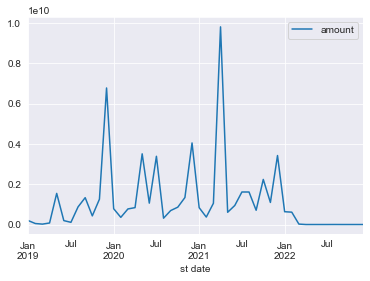

In [37]:
dt['2019-01-31':'2022-12-31'].plot()

In [38]:
dt

,amount
st date,
2013-12-31,496500.0
2014-01-31,0.0
2014-02-28,2863059.0
2014-03-31,0.0
2014-04-30,9374840.0
...,...
2022-08-31,1217796.0
2022-09-30,0.0
2022-10-31,0.0


In [39]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.express.colors
from plotly.subplots import make_subplots

In [40]:
pd.DataFrame(dt.index)

,st date
0,2013-12-31
1,2014-01-31
2,2014-02-28
3,2014-03-31
4,2014-04-30
...,...
104,2022-08-31
105,2022-09-30
106,2022-10-31
107,2022-11-30


In [221]:
fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(x = dt.index, y = dt['amount'],name='Amount of guarantees', mode = 'lines'),
            secondary_y=False)
fig.add_trace(go.Scatter(x = n.index, y = n['count'],name='Number of contracts', mode='lines'),
              secondary_y=True)
fig.update_layout(title_text = 'Amount|count ',xaxis_range = ['2013-12-31', '2022-12-31'])
fig.update_xaxes(title_text = 'Date', rangeslider_visible=True)
fig.update_yaxes(title_text = 'Amount', secondary_y=False)
fig.update_yaxes(title_text = 'Count', secondary_y=True)

fig.show()

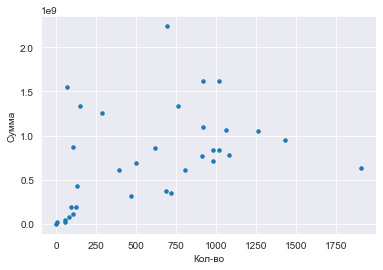

In [128]:
xs = dtn['count']
ys = dtn['amount']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Кол-во')
plt.ylabel('Сумма')
plt.show()

In [223]:
data_model = pd.concat([dt, n], axis=1)
data_model = data_model[-48:-8]

In [224]:
data_model['amount'].corr(data_model['count']) #к-т корреляции

0.5537861619514469

In [225]:
data_model

,amount,count
st date,,
2019-01-31,1.964008e+08,123
2019-02-28,4.908946e+07,55
2019-03-31,1.955362e+07,52
2019-04-30,7.622638e+07,79
2019-05-31,1.544688e+09,69
2019-06-30,1.937947e+08,92
2019-07-31,1.086469e+08,103
2019-08-31,8.755279e+08,104
2019-09-30,1.333051e+09,147


In [226]:
import seaborn as sns

C:\Users\gosti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='amount'>

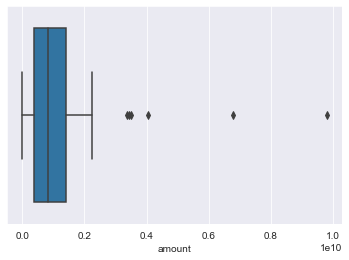

In [99]:
sns.boxplot(data_model['amount'])

In [227]:
print(np.where(data_model['amount']> 0.3*1e10))

(array([11, 16, 18, 23, 27, 35], dtype=int64),)


In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [161]:
from statsmodels.tsa._stl import STL

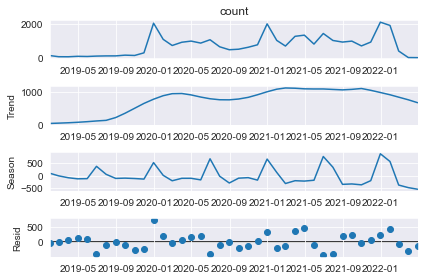

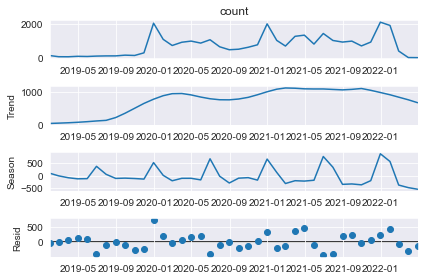

In [228]:
stl = STL(data_model['count'], period=6).fit()
stl.plot()

In [230]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(stl.observed)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.018133660213113793
Ряд стационарный


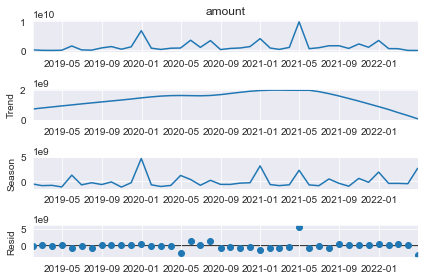

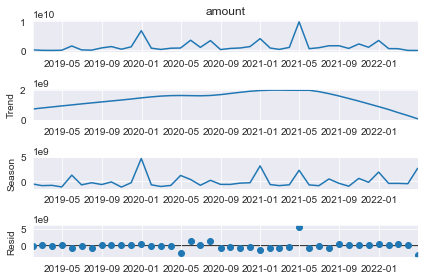

In [231]:
stl_amount = STL(data_model['amount'], period=12).fit()
stl_amount.plot()

In [232]:
from statsmodels.tsa.stattools import adfuller
adf_test_amount = adfuller(stl_amount.observed)
print('p-value = ' + str(adf_test_amount[1]))
if adf_test_amount[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 1.6937854348535634e-08
Ряд стационарный


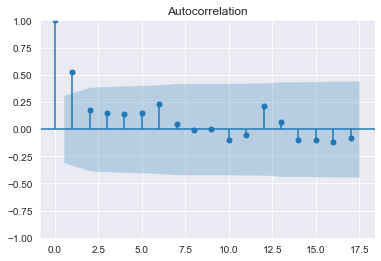

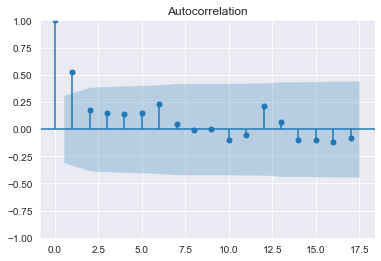

In [163]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stl.observed)

In [175]:
import math

In [234]:
data_model['LN(amount)'] = np.log(data_model['amount'])
data_model['LN(count)'] = np.log(data_model['count'])

In [235]:
data_model

,amount,count,LN(amount),LN(count)
st date,,,,
2019-01-31,1.964008e+08,123,19.095668,4.812184
2019-02-28,4.908946e+07,55,17.709155,4.007333
2019-03-31,1.955362e+07,52,16.788671,3.951244
2019-04-30,7.622638e+07,79,18.149218,4.369448
2019-05-31,1.544688e+09,69,21.158087,4.234107
2019-06-30,1.937947e+08,92,19.082310,4.521789
2019-07-31,1.086469e+08,103,18.503613,4.634729
2019-08-31,8.755279e+08,104,20.590338,4.644391
2019-09-30,1.333051e+09,147,21.010736,4.990433


In [459]:
X = data_model[['count']][:37] #берем данные до января 2022 года включительно
Y = data_model['amount'][:37]

In [460]:
X

,count
st date,
2019-01-31,123
2019-02-28,55
2019-03-31,52
2019-04-30,79
2019-05-31,69
2019-06-30,92
2019-07-31,103
2019-08-31,104
2019-09-30,147


In [237]:
from sklearn.model_selection import train_test_split

In [461]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [239]:
from sklearn.linear_model import LinearRegression

In [462]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [463]:
Y_pred = model.predict(X_test)

In [283]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [464]:
MAE = mean_absolute_error(Y_test, Y_pred)
MSE = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)
print('MAE = ', np.round(MAE, 3))
print('MSE =', np.round(MSE, 3))
print('R^2 =', np.round(R2, 3))

MAE =  1021065131.533
MSE = 2.343965593815844e+18
R^2 = 0.399


In [285]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [441]:
ridge = Ridge()
parameters = {
    'alpha': np.arange(1, 10)
}
grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [442]:
grid.best_params_

{'alpha': 9}

In [443]:
ridge_best = Ridge(**grid.best_params_)
ridge_best.fit(X_train, Y_train)
mean_squared_error(Y_test, ridge_best.predict(X_test))

2.3439669280171197e+18

In [263]:
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [264]:
n_folds = 5

In [265]:
model_br = BayesianRidge()
model_lr = LinearRegression()
model_etc = ElasticNet()
model_svr = SVR()
model_gbr = GradientBoostingRegressor()
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

In [266]:
model_names = ['BayesianRidge','LinearRegression', 'ElasticNet', 'SVR', 'GBR','XGBR']
model_dir = [model_br, model_lr, model_etc, model_svr, model_gbr, model_xgb]

In [451]:
# Оценка перекрестной проверки и обучение модели
cv_score_list = [] # Список результатов перекрестной проверки
y_train_pre = [] # Список значений y, предсказываемых каждой моделью
y_test_pre = [] # Список результатов предсказания набора тестов
for model in model_dir:
    scores = cross_val_score(model, X_train, Y_train, cv = n_folds, scoring = 'r2')

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be 

In [452]:
cv_score_list.append(scores)
y_train_pre.append(model.fit(X_train, Y_train).predict(X_train))
y_test_pre.append(model.fit(X_train, Y_train).predict(X_test))

C:\Users\gosti\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [453]:
n_samples, n_features = X_train.shape # Общий размер обучающей выборки, общее количество функций
n_samples_test = X_test.shape[0]

In [454]:
model_metrics_name = [mean_absolute_error, mean_squared_error, r2_score]
model_train_metrics = [] # Список значений оценки обучения
model_test_metrics = [] # Список значений оценки прогнозирования регрессии

In [455]:
for i in range(len(model_dir)):
    tmp_list = []
    tmp2_list = []

In [456]:
for m in model_metrics_name:
    tmp_score = m(Y_train, y_train_pre[0]) # результаты каждоq оценки регрессии
    tmp_list.append(tmp_score)
    tmp2_score = m(Y_test, y_test_pre[0])
    tmp2_list.append(tmp2_score)

In [457]:
model_train_metrics.append(tmp_list)
model_test_metrics.append(tmp2_list)

In [458]:
df1 = pd.DataFrame(cv_score_list, index = model_names) # ДФ для перекрестной проверки
df2 = pd.DataFrame(model_train_metrics,
                    index = model_names,
                   columns = ['MAE', 'MSE', 'R2']) # ДФ оценок регрессионного обучения
df3 = pd.DataFrame(model_test_metrics,
                    index = model_names,
                   columns = ['MAE', 'MSE', 'R2']) # ДФ оценок предсказания регрессии

print('samples: %d \t features: %d'%(n_samples, n_features))
print(70*'-')
print('Cross validation result:')
print(df1)
print(70*'-')
print('Regression train metrics:')
print(df2)
print(70*'-')
print('Regression test metrics:')
print(df3)
print(70*'-')
print('short name \t full name')
print('MAE \t mean_absolute_error')
print('MSE \t mean_squared_error')
print('R2 \t R2')
print(70*'-')


samples: 24 	 features: 13
----------------------------------------------------------------------
Cross validation result:
                         0          1         2          3         4
BayesianRidge    -0.191709 -19.832634  0.448036 -13.330983 -4.999471
LinearRegression -0.191709 -19.832634  0.448036 -13.330983 -4.999471
ElasticNet       -0.191709 -19.832634  0.448036 -13.330983 -4.999471
SVR              -0.191709 -19.832634  0.448036 -13.330983 -4.999471
GBR              -0.191709 -19.832634  0.448036 -13.330983 -4.999471
XGBR             -0.191709 -19.832634  0.448036 -13.330983 -4.999471
----------------------------------------------------------------------
Regression train metrics:
                           MAE           MSE   R2
BayesianRidge     18705.713151  5.776649e+08  1.0
LinearRegression  18705.713151  5.776649e+08  1.0
ElasticNet        18705.713151  5.776649e+08  1.0
SVR               18705.713151  5.776649e+08  1.0
GBR               18705.713151  5.776649e+08  1

Кол-во договоров
=

In [338]:
data_count = data_model[10:]

In [389]:
fig2 = make_subplots(specs=[[{'secondary_y': True}]])
fig2.add_trace(go.Scatter(x=data_model['N'], y=data_model['count'],name='data_model', mode = 'lines'),
            secondary_y=False) # исходные данные
fig2.add_trace(go.Scatter(x = data_model['N'][10:], y = data_model['count'][10:],name='data_count', mode='lines'),
              secondary_y=False) #данные, которые берутся для построения модели

fig2.show()

In [339]:
data_count['N'] = range(1,len(data_count)+1)

C:\Temp\ipykernel_8160\1283896821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [340]:
data_count

,amount,count,LN(amount),LN(count),N,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
st date,,,,,,,,,,,,,,,,,
2019-11-30,1.256651e+09,284,20.951716,5.648974,1,False,False,False,False,False,False,False,False,False,False,True,False
2019-12-31,6.776751e+09,2035,22.636764,7.618251,2,False,False,False,False,False,False,False,False,False,False,False,True
2020-01-31,7.836339e+08,1081,20.479453,6.985642,3,False,False,False,False,False,False,False,False,False,False,False,False
2020-02-29,3.554648e+08,718,19.688937,6.576470,4,False,False,False,False,False,False,False,False,False,False,False,False
2020-03-31,7.727438e+08,910,20.465458,6.813445,5,False,False,False,False,False,False,False,False,False,False,False,False
2020-04-30,8.381224e+08,978,20.546675,6.885510,6,False,False,False,False,False,False,False,False,False,False,False,False
2020-05-31,3.508018e+09,860,21.978317,6.756932,7,False,False,False,False,False,False,False,False,False,False,False,False
2020-06-30,1.061134e+09,1058,20.782604,6.964136,8,False,False,False,False,False,False,False,False,False,False,False,False
2020-07-31,3.386221e+09,642,21.942980,6.464588,9,False,False,False,False,False,False,False,False,False,False,False,False


In [341]:
for x in range(1,13):
    data_count['season_' + str(x)] = data_count['N'] == x

C:\Temp\ipykernel_8160\778520133.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [342]:
season_columns = ['season_' + str(x) for x in range(1,13)]

In [343]:
data_count

,amount,count,LN(amount),LN(count),N,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
st date,,,,,,,,,,,,,,,,,
2019-11-30,1.256651e+09,284,20.951716,5.648974,1,True,False,False,False,False,False,False,False,False,False,False,False
2019-12-31,6.776751e+09,2035,22.636764,7.618251,2,False,True,False,False,False,False,False,False,False,False,False,False
2020-01-31,7.836339e+08,1081,20.479453,6.985642,3,False,False,True,False,False,False,False,False,False,False,False,False
2020-02-29,3.554648e+08,718,19.688937,6.576470,4,False,False,False,True,False,False,False,False,False,False,False,False
2020-03-31,7.727438e+08,910,20.465458,6.813445,5,False,False,False,False,True,False,False,False,False,False,False,False
2020-04-30,8.381224e+08,978,20.546675,6.885510,6,False,False,False,False,False,True,False,False,False,False,False,False
2020-05-31,3.508018e+09,860,21.978317,6.756932,7,False,False,False,False,False,False,True,False,False,False,False,False
2020-06-30,1.061134e+09,1058,20.782604,6.964136,8,False,False,False,False,False,False,False,True,False,False,False,False
2020-07-31,3.386221e+09,642,21.942980,6.464588,9,False,False,False,False,False,False,False,False,True,False,False,False


In [444]:
data_count

,amount,count,LN(amount),LN(count),N,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
st date,,,,,,,,,,,,,,,,,
2019-11-30,1.256651e+09,284,20.951716,5.648974,1,True,False,False,False,False,False,False,False,False,False,False,False
2019-12-31,6.776751e+09,2035,22.636764,7.618251,2,False,True,False,False,False,False,False,False,False,False,False,False
2020-01-31,7.836339e+08,1081,20.479453,6.985642,3,False,False,True,False,False,False,False,False,False,False,False,False
2020-02-29,3.554648e+08,718,19.688937,6.576470,4,False,False,False,True,False,False,False,False,False,False,False,False
2020-03-31,7.727438e+08,910,20.465458,6.813445,5,False,False,False,False,True,False,False,False,False,False,False,False
2020-04-30,8.381224e+08,978,20.546675,6.885510,6,False,False,False,False,False,True,False,False,False,False,False,False
2020-05-31,3.508018e+09,860,21.978317,6.756932,7,False,False,False,False,False,False,True,False,False,False,False,False
2020-06-30,1.061134e+09,1058,20.782604,6.964136,8,False,False,False,False,False,False,False,True,False,False,False,False
2020-07-31,3.386221e+09,642,21.942980,6.464588,9,False,False,False,False,False,False,False,False,True,False,False,False


In [448]:
X2

,count,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
st date,,,,,,,,,,,,,
2019-11-30,284,True,False,False,False,False,False,False,False,False,False,False,False
2019-12-31,2035,False,True,False,False,False,False,False,False,False,False,False,False
2020-01-31,1081,False,False,True,False,False,False,False,False,False,False,False,False
2020-02-29,718,False,False,False,True,False,False,False,False,False,False,False,False
2020-03-31,910,False,False,False,False,True,False,False,False,False,False,False,False
2020-04-30,978,False,False,False,False,False,True,False,False,False,False,False,False
2020-05-31,860,False,False,False,False,False,False,True,False,False,False,False,False
2020-06-30,1058,False,False,False,False,False,False,False,True,False,False,False,False
2020-07-31,642,False,False,False,False,False,False,False,False,True,False,False,False


In [447]:
X2 = data_count[['count']+ season_columns]
Y2 = data_count['amount']

In [358]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [359]:
model = LinearRegression()
model.fit(X2_train, Y2_train)

LinearRegression()

In [360]:
Y2_pred = model.predict(X2_test)

In [361]:
MAE = mean_absolute_error(Y2_test, Y2_pred)
MSE = mean_squared_error(Y2_test, Y2_pred)
R2 = r2_score(Y2_test, Y2_pred)
print('MAE = ', np.round(MAE, 3))
print('MSE =', np.round(MSE, 3))
print('R^2 =', np.round(R2, 3))

MAE =  45.764
MSE = 40578.287
R^2 = -0.034


In [365]:
X2_test

,N
st date,
2020-01-31,3
2022-03-31,29
2020-12-31,14
2020-09-30,11
2022-01-31,27
2021-11-30,25


Хольт Винтерс
=
Прогноз количества сделок по банковским гарантиям

In [368]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

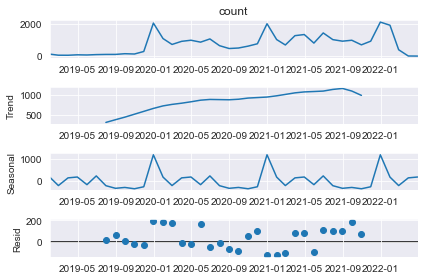

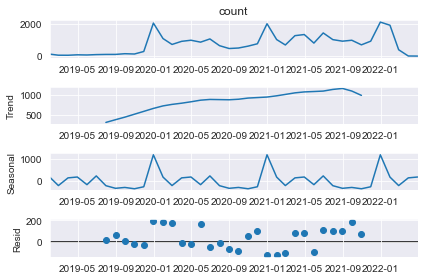

In [371]:
decompose_result = seasonal_decompose(data_model['count'],model='additive')
decompose_result.plot()

In [373]:
data_model.index.freq = 'M'

In [375]:
data_model['HWES3_ADD'] = ExponentialSmoothing(data_model['count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data_model['HWES3_MUL'] = ExponentialSmoothing(data_model['count'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

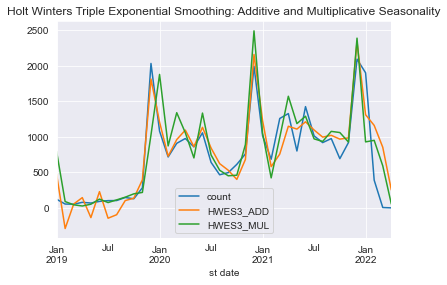

In [376]:
data_model[['count','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [427]:
data_model_new = data_model[:37] #уберем данные с февраля 2022 года
train_count = data_model_new['count'][:30]
test_count = data_model_new['count'][28:]

In [412]:
data_model_new

,amount,count,LN(amount),LN(count),N,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12,HWES3_ADD,HWES3_MUL
st date,,,,,,,,,,,,,,,,,,,
2019-01-31,1.964008e+08,123,19.095668,4.812184,1,True,False,False,False,False,False,False,False,False,False,False,False,479.118177,798.221117
2019-02-28,4.908946e+07,55,17.709155,4.007333,2,False,True,False,False,False,False,False,False,False,False,False,False,-289.864994,89.752370
2019-03-31,1.955362e+07,52,16.788671,3.951244,3,False,False,True,False,False,False,False,False,False,False,False,False,55.784845,44.145313
2019-04-30,7.622638e+07,79,18.149218,4.369448,4,False,False,False,True,False,False,False,False,False,False,False,False,145.176832,27.225624
2019-05-31,1.544688e+09,69,21.158087,4.234107,5,False,False,False,False,True,False,False,False,False,False,False,False,-135.994954,52.504593
2019-06-30,1.937947e+08,92,19.082310,4.521789,6,False,False,False,False,False,True,False,False,False,False,False,False,229.483372,124.662691
2019-07-31,1.086469e+08,103,18.503613,4.634729,7,False,False,False,False,False,False,True,False,False,False,False,False,-144.903202,75.572977
2019-08-31,8.755279e+08,104,20.590338,4.644391,8,False,False,False,False,False,False,False,True,False,False,False,False,-95.354072,113.545989
2019-09-30,1.333051e+09,147,21.010736,4.990433,9,False,False,False,False,False,False,False,False,True,False,False,False,103.736686,151.506389


In [431]:
fitted_model = ExponentialSmoothing(train_count,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(9)

In [423]:
np.round(test_predictions)

2021-07-31    1038.0
2021-08-31     939.0
2021-09-30     961.0
2021-10-31     994.0
2021-11-30    1147.0
2021-12-31    2663.0
2022-01-31    1607.0
Freq: M, dtype: float64

In [429]:
fig3 = make_subplots(specs=[[{'secondary_y': True}]])
fig3.add_trace(go.Scatter(x=train_count.index, y=train_count,name='Real', mode = 'lines'),
            secondary_y=False) # исходные данные
fig3.add_trace(go.Scatter(x = test_count.index, y = test_count,name='Test', mode='lines'),
              secondary_y=False) #данные, которые берутся для построения модели
fig3.add_trace(go.Scatter(x = test_predictions.index, y = np.round(test_predictions),name='Test_predict', mode='lines'),
              secondary_y=False) #данные, которые берутся для построения модели
fig3.add_trace(go.Scatter(x = fitted_model.forecast(13).index, y = np.round(fitted_model.forecast(13)),name='Test_predict', mode='lines'),
              secondary_y=False)
fig3.show()

In [432]:
print(f'Mean Absolute Error = {mean_absolute_error(test_count,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_count,test_predictions)}')

Mean Absolute Error = 513.6364756214589
Mean Squared Error = 581475.6872779366
